# Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods

## Part 1

Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision ε = 0.001) solution x: f(x) → min for the following functions and domains:

f(x) = x^3, x ∈ [0, 1];

f(x) = |x − 0.2|, x ∈ [0, 1];

f(x) = x sin(1/x), x ∈ [0.01, 1];

Calculate the number of f-calculations and the number of iterations performed in each method and analyze the results. Explain differences (if any) in the results obtained.

In [54]:
import math

In [55]:
# f(x) = x^3

def f_1(x):
    return x ** 3

In [56]:
# f(x) = |x - 0.2|

def f_2(x):
    return abs(x - 0.2)

In [57]:
# f(x) = x * sin(1/x)

def f_3(x):
    if x == 0:
        return 0
    return x * math.sin(1 / x)

In [58]:
int_1 = (0, 1)
int_2 = (0, 1)
int_3 = (0.01, 1)

# ε
eps = 0.001

In [59]:
# exhaustive search

def exhaustive_search(func, eps, interval):
    a, b = interval
    num_iterations = int((b - a) / eps)
    
    min_x = a
    min_value = func(a)
    
    for i in range(1, num_iterations + 1):
        x = a + i * eps
        value = func(x)
        
        if value < min_value:
            min_x = x
            min_value = value
            
    return min_x, min_value, num_iterations

In [60]:
# dichotomy

def dichotomy(func, eps, interval):
    a, b = interval
    num_iterations = int(math.log2((b - a) / eps))
    
    mid = (a + b) / 2
    
    for _ in range(num_iterations):
        x1 = mid - eps / 2
        x2 = mid + eps / 2
        f_x1 = func(x1)
        f_x2 = func(x2)
        
        if f_x1 < f_x2:
            b = x2
        else:
            a = x1
        
        mid = (a + b) / 2
    
    min_x = mid
    min_value = func(min_x)
    
    return min_x, min_value, num_iterations

In [61]:
# golden section search

def golden_section_search(func, eps, interval):
    a, b = interval
    ratio = (1 + math.sqrt(5)) / 2 
    num_iterations = int(math.log((b - a) / eps) / math.log(ratio))
    
    x1 = b - (b - a) / ratio
    x2 = a + (b - a) / ratio
    
    f_x1 = func(x1)
    f_x2 = func(x2)
    
    for _ in range(num_iterations):
        if f_x1 < f_x2:
            b = x2
            x2 = x1
            x1 = b - (b - a) / ratio
            f_x2 = f_x1
            f_x1 = func(x1)
        else:
            a = x1
            x1 = x2
            x2 = a + (b - a) / ratio
            f_x1 = f_x2
            f_x2 = func(x2)
            
    min_x = (a + b) / 2
    min_value = func(min_x)
    
    return min_x, min_value, num_iterations

In [62]:
exhaustive_res_1 = exhaustive_search(f_1, eps, int_1)
dichotomy_res_1 = dichotomy(f_1, eps, int_1)
golden_res_1 = golden_section_search(f_1, eps, int_1)

In [63]:
print("f(x) = x^3")
print("exhaustive search result:", exhaustive_res_1)
print("dichotomy search result:", dichotomy_res_1)
print("golden section search result:", golden_res_1)
print()

f(x) = x^3
exhaustive search result: (0, 0, 1000)
dichotomy search result: (0.0014755859375, 3.2128727352246637e-09, 9)
golden section search result: (0.0005931206448211135, 2.086551567875078e-10, 14)



For the first function, f(x) = x^3, defined in the interval [0, 1], we applied three different optimization methods: exhaustive search, dichotomy search, and golden section search.

The dichotomy and golden section search methods achieved the desired precision with significantly fewer iterations compared to the exhaustive search method. The golden section search method provided better accuracy in locating a minimum very close to zero.

In [64]:
exhaustive_res_2 = exhaustive_search(f_2, eps, int_2)
dichotomy_res_2 = dichotomy(f_2, eps, int_2)
golden_res_2 = golden_section_search(f_2, eps, int_2)

In [65]:
print("f(x) = |x - 0.2|")
print("exhaustive search result:", exhaustive_res_2)
print("dichotomy search result:", dichotomy_res_2)
print("golden section search result:", golden_res_2)
print()

f(x) = |x - 0.2|
exhaustive search result: (0.2, 0.0, 1000)
dichotomy search result: (0.2004951171875, 0.0004951171874999771, 9)
golden section search result: (0.19984676181669334, 0.00015323818330667538, 14)



For the second function, f(x) = |x - 0.2|, defined in the interval [0, 1], we applied three different optimization methods: exhaustive search, dichotomy search, and golden section search.

The results show that the dichotomy and golden section search methods converged to the minimum more efficiently compared to the exhaustive search, requiring significantly fewer iterations. The golden section search method achieved slightly better accuracy in finding a minimum closer to zero.

In [66]:
exhaustive_res_3 = exhaustive_search(f_3, eps, int_3)
dichotomy_res_3 = dichotomy(f_3, eps, int_3)
golden_res_3 = golden_section_search(f_3, eps, int_3)

In [67]:
print("f(x) = x * sin(1/x)")
print("exhaustive search result:", exhaustive_res_3)
print("dichotomy search result:", dichotomy_res_3)
print("golden section search result:", golden_res_3)

f(x) = x * sin(1/x)
exhaustive search result: (0.223, -0.21722461258083445, 990)
dichotomy search result: (0.2220146484375, -0.2172209845725795, 9)
golden section search result: (0.22249530721197977, -0.2172335044886914, 14)


For the third function, f(x) = x * sin(1/x), defined in the interval [0.01, 1], we applied three different optimization methods: exhaustive search, dichotomy search, and golden section search.

The results show that the dichotomy and golden section search methods converged to the minimum more efficiently compared to the exhaustive search, requiring significantly fewer iterations. The difference in the function values among the methods is very small, indicating that they found solutions that are close to each other.

## Part 2

In [68]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
np.random.seed(42)

In the next cell we generate data for performing experiments

0.3745401188473625 0.9507143064099162


Text(0.5, 1.0, 'Generated Function')

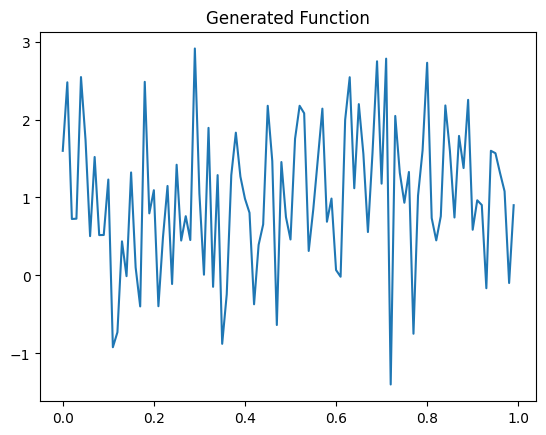

In [69]:
# GENERATE alpha and beta
alpha = np.random.uniform()
beta = np.random.uniform()
print(alpha, beta)

# GENERATE linspace
x = [k/100 for k in range(100)]
y = [alpha*x_k + beta + np.random.normal() for x_k in x]


plt.plot(x, y)
plt.title('Generated Function')

In the next cell, we define linear and rational functions that we will try to approximate our data with. We also define a least_squares function that we will optimize using the parameters a and b.

In [104]:
def linear_aprox(x_k, a, b):
    return a*x_k + b

def rational_aprox(x_k, a, b):
    return a/(1+b*x_k)

linear_aprox_v = np.vectorize(linear_aprox, excluded=['a', 'b'])
rational_aprox_v = np.vectorize(rational_aprox, excluded=['a', 'b'])

# Define the function to optimize
def least_squares_linear(params):
    a, b = params  # Unpack parameters
    y_hat = linear_aprox_v(x, a, b)
    errors = (y_hat - y) ** 2
    return np.sum(errors)

def least_squares_rational(params):
    a, b = params  # Unpack parameters
    y_hat = rational_aprox_v(x, a, b)
    errors = (y_hat - y)**2
    return np.sum(errors)


### 2.1. Exhaustive search

In [107]:
linear_range = (slice(0.3, 0.8, 0.001), slice(0.5, 1, 0.001),) 
result_linear = optimize.brute(least_squares_linear, linear_range, full_output=True, finish=None)
rational_range = (slice(0.5, 1, 0.001), slice(-0.5, 0, 0.001)) 
result_rational = optimize.brute(least_squares_rational, rational_range, full_output=True, finish=None)

Linear approximation
Optimal 'a': 0.45299999999999996
Optimal 'b': 0.786
Minimum Error: 83.01040037439199
Iterations number: 250000


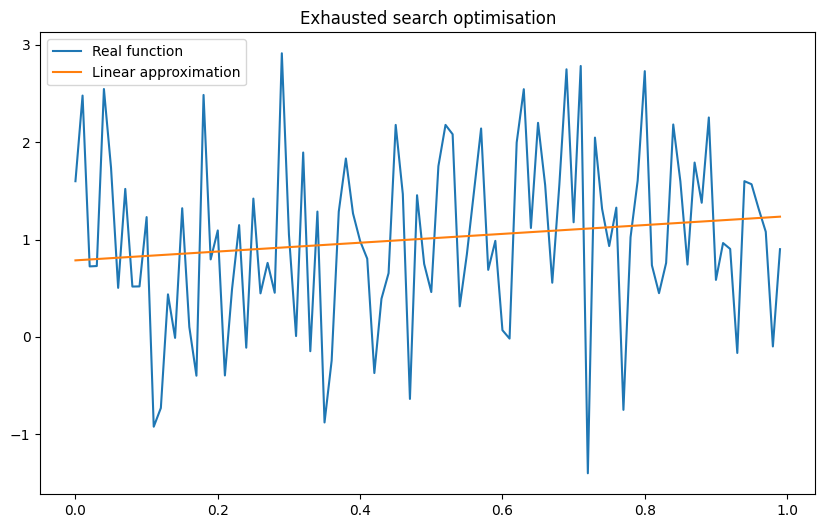

In [122]:
y_hat = linear_aprox_v(x, *result_linear[0])

# plot lines
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Real function')
plt.plot(x, y_hat, label='Linear approximation')
plt.legend()
plt.title('Exhausted search optimisation')

# output optimisation result
print('Linear approximation')
print("Optimal 'a':", result_linear[0][0])
print("Optimal 'b':", result_linear[0][1])
print("Minimum Error:", result_linear[1])
print("Iterations number:", result_linear[3].size)

Exhaustive search, while systematically exploring a wide range of parameter values, yielded the lowest minimum error of 83.01 for linear approximation. However, this approach was computationally expensive, requiring a very high number of iterations (250,000) and function evaluations to achieve this result.

Rational approximation
Optimal 'a': 0.8280000000000001
Optimal 'b': -0.34199999999999997
Minimum Error: 83.09217857874556
Iterations number: 250000


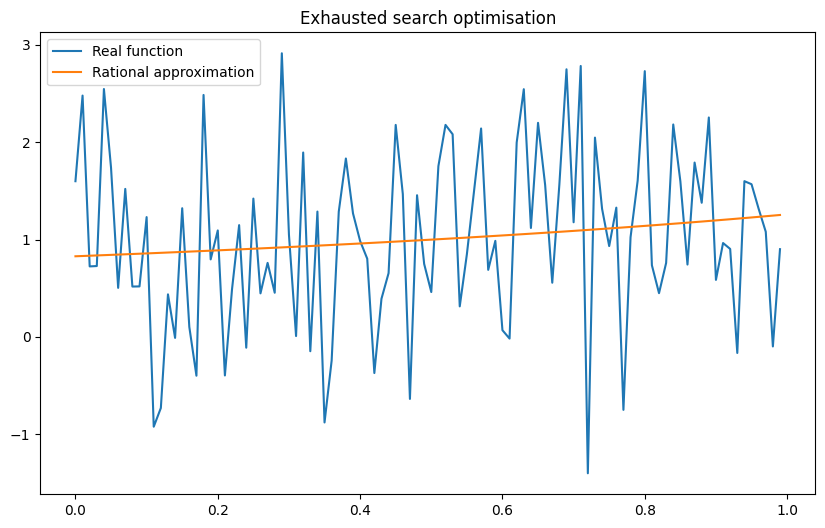

In [123]:
y_hat2 = rational_aprox_v(x, *result_rational[0])

# plot lines
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Real function')
plt.plot(x, y_hat2, label='Rational approximation')
plt.legend()
plt.title('Exhausted search optimisation')

print('Rational approximation')
print("Optimal 'a':", result_rational[0][0])
print("Optimal 'b':", result_rational[0][1])
print("Minimum Error:", result_rational[1])
print("Iterations number:", result_rational[3].size)


Exhaustive search, while systematically exploring a wide range of parameter values, yielded the lowest minimum error of 83.01 for linear approximation. However, this approach was computationally expensive, requiring a very high number of iterations (250,000) and function evaluations to achieve this result.

### 2.2. Gauss method

In [110]:
def d(f, e, i):
    a, b = i
    n = int(np.log2((b - a) / e))

    for _ in range(n):
        m = (a + b) / 2
        x1 = m - e / 2
        x2 = m + e / 2
        f1 = f(x1)
        f2 = f(x2)
        
        
        if f1 < f2:
            b = x2
        else:
            a = x1

    return (a+b)/2, n


def coordinate_decent(func, range_a, range_b, epsilon=10e-3):
    prev_a = 0
    prev_b = 0
    cnt_iterations = 0
    while True:
        func_fixed_b = lambda x: func([x, prev_b])
        a, n = d(func_fixed_b, i=range_a, e=0.001)
        cnt_iterations +=n
        func_fixed_a = lambda x: func([a, x])
        b, n = d(func_fixed_a, i=range_b, e=0.001)
        cnt_iterations +=n

        if abs(func([a, b]) - func([prev_a,  prev_b])) < epsilon:
            return a, b, cnt_iterations
        prev_a, prev_b = a, b

In [111]:
linear_gauss = coordinate_decent(least_squares_linear, [0.3, 0.8], [0.5, 1])
rational_gauss = coordinate_decent(least_squares_rational, [0.5, 1], [-0.5, 0])

Linear approximation
Optimal 'a': 0.48859960937499997
Optimal 'b': 0.768517578125
Minimum Error: 83.02052071724445
Iterations number: 144


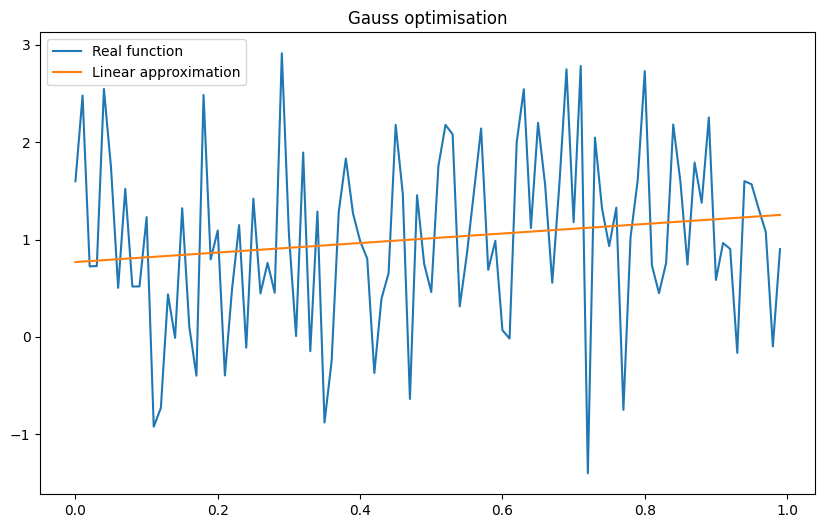

In [119]:
y_hat = linear_aprox_v(x, *linear_gauss[:2])

# plot lines
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Real function')
plt.plot(x, y_hat, label='Linear approximation')
plt.legend()
plt.title('Gauss optimisation')

# output optimisation result
print('Linear approximation')
print("Optimal 'a':", linear_gauss[0])
print("Optimal 'b':", linear_gauss[1])
print("Minimum Error:", least_squares_linear(linear_gauss[:2]))
print("Iterations number:", linear_gauss[2])

 The Gauss method achieved an error of 83.02 for linear approximation while significantly reducing the computational burden with only 144 iterations (equivalent to 288 function evaluations, as two function evaluations are performed per iteration).

Rational approximation
Optimal 'a': 0.844537109375
Optimal 'b': -0.323095703125
Minimum Error: 83.10304159394319
Iterations number: 128


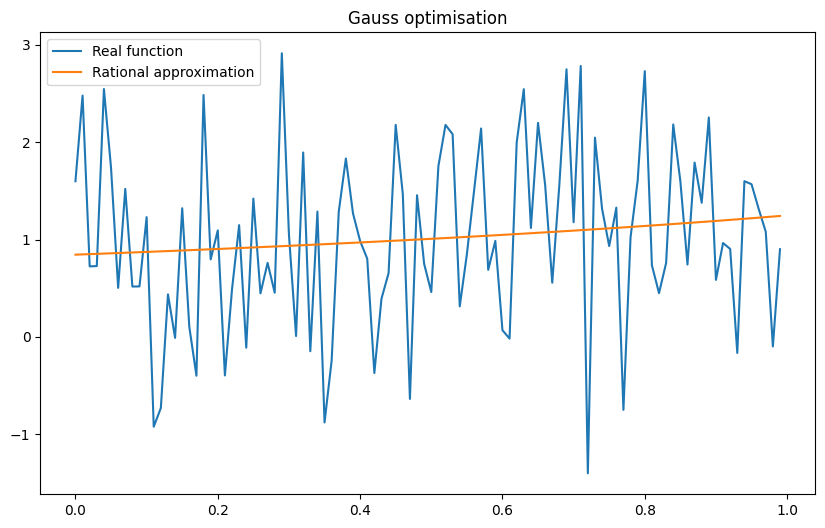

In [118]:
y_hat2 = rational_aprox_v(x, *rational_gauss[:2])

# plot lines
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Real function')
plt.plot(x, y_hat2, label='Rational approximation')
plt.legend()
plt.title('Gauss optimisation')

print('Rational approximation')
print("Optimal 'a':", rational_gauss[0])
print("Optimal 'b':", rational_gauss[1])
print("Minimum Error:", least_squares_rational(rational_gauss[:2]))
print("Iterations number:", rational_gauss[2])

For rational approximation, the Gauss method also reduced the error to 83.10 with 128 iterations (equivalent to 256 function evaluations), improving efficiency compared to exhaustive search.

#### 2.3 Nelder-Mead method

In [92]:
from scipy.optimize import minimize

In [96]:
nel_mead_linear = minimize(least_squares_linear, [0, 0], method='Nelder-Mead')
nel_mead_rational = minimize(least_squares_rational, [0, 0], method='Nelder-Mead')

Linear approximation
Optimal 'a': 0.4537600945008439
Optimal 'b': 0.7857187254222491
Minimum Error: 83.01039508782563
Iterations number: 64
Function calls: 121


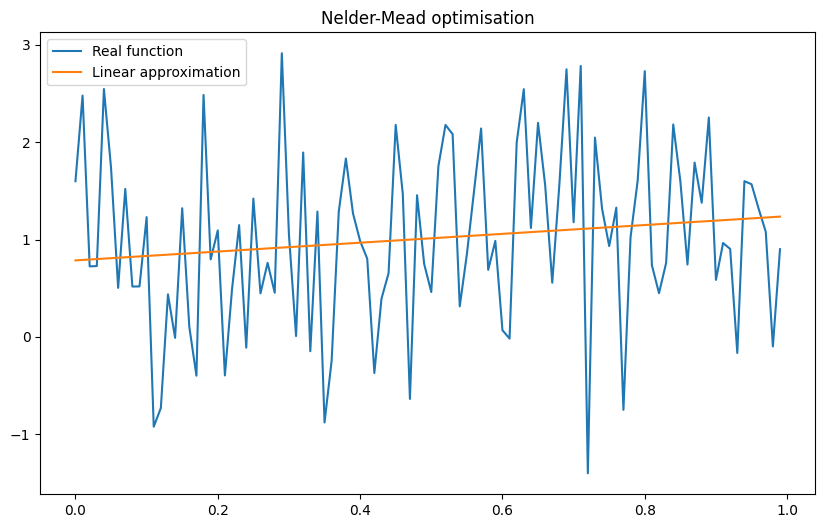

In [128]:
y_hat = linear_aprox_v(x, nel_mead_linear['x'][0], nel_mead_linear['x'][1])

# plot lines
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Real function')
plt.plot(x, y_hat, label='Linear approximation')
plt.legend()
plt.title('Nelder-Mead optimisation')

# output optimisation result
print('Linear approximation')
print("Optimal 'a':", nel_mead_linear['x'][0])
print("Optimal 'b':", nel_mead_linear['x'][1])
print("Minimum Error:", nel_mead_linear['fun'])
print("Iterations number:", nel_mead_linear['nit'])
print("Function calls:", nel_mead_linear['nfev'])


Nelder-Mead produced results similar to the exhausted search for linear approximation but with a significantly lower number of iterations (64) and function evaluations (121). This method balances accuracy with efficiency.

Rational approximation
Optimal 'a': 0.8283543087312124
Optimal 'b': -0.341200080435452
Minimum Error: 83.09216230880031
Iterations number: 61
Function calls: 119


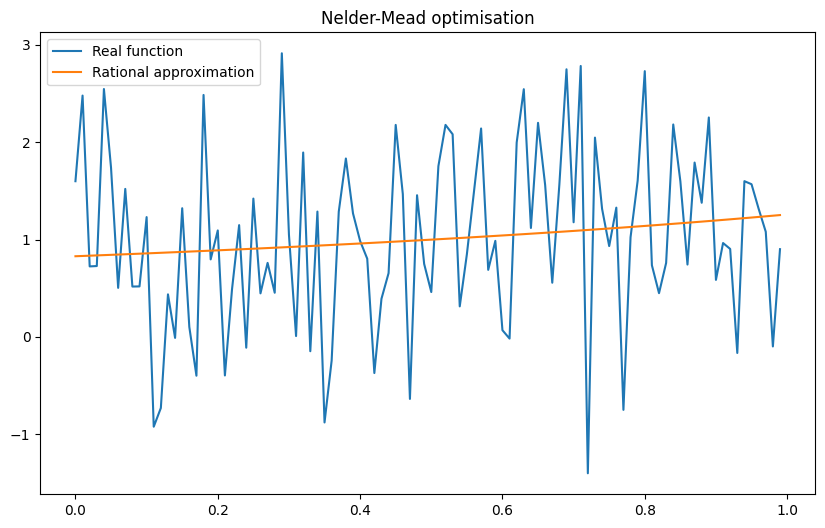

In [129]:
y_hat2 = rational_aprox_v(x, nel_mead_rational['x'][0], nel_mead_rational['x'][1])

# plot lines
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Real function')
plt.plot(x, y_hat2, label='Rational approximation')
plt.legend()
plt.title('Nelder-Mead optimisation')

print('Rational approximation')
print("Optimal 'a':", nel_mead_rational['x'][0])
print("Optimal 'b':", nel_mead_rational['x'][1])
print("Minimum Error:", nel_mead_rational['fun'])
print("Iterations number:", nel_mead_rational['nit'])
print("Function calls:", nel_mead_rational['nfev'])


Nelder-Mead also reached a similar error of 83.09 for rational approximation with just 61 iterations (with 119 function evaluations), highlighting its efficiency in finding optimal parameters.